# Inferencing Code

In [1]:
#!/usr/bin/env python
# coding: utf-8

import os, sys
sys.path.insert(0, "..")
sys.path.insert(0, "/workspace/update/torchxrayvision")
sys.path.insert(0, "/workspace/update/torchxrayvision/torchxrayvision")
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import argparse
import skimage
import pprint
import cv2

import torch
import torch.nn.functional as F
import torchvision, torchvision.transforms
import skimage, skimage.filters
import torchxrayvision as xrv


#parser = argparse.ArgumentParser()
#parser.add_argument('img_path', type=str)
#parser.add_argument('-cuda', default=False, help='', action='store_true')
#parser.add_argument('-saliency_path',
#                    default=None,
#                    help='path to write the saliancy map as an image')





In [39]:
from torchxrayvision.models import model_urls as model_urls

In [3]:
model_urls

{'all': {'weights_url': 'https://github.com/mlmed/torchxrayvision/releases/download/v1/nih-pc-chex-mimic_ch-google-openi-kaggle-densenet121-d121-tw-lr001-rot45-tr15-sc15-seed0-best.pt',
  'op_threshs': [0.07422872,
   0.038290843,
   0.09814756,
   0.0098118475,
   0.023601074,
   0.0022490358,
   0.010060724,
   0.103246614,
   0.056810737,
   0.026791653,
   0.050318155,
   0.023985857,
   0.01939503,
   0.042889766,
   0.053369623,
   0.035975814,
   0.20204692,
   0.05015312],
  'ppv80_thres': [0.72715247,
   0.8885005,
   0.92493945,
   0.6527224,
   0.68707734,
   0.46127197,
   0.7272054,
   0.6127343,
   0.9878492,
   0.61979693,
   0.66309816,
   0.7853459,
   0.930661,
   0.93645346,
   0.6788558,
   0.6547198,
   0.61614525,
   0.8489876],
  'base': 'cohen'},
 'nih': {'weights_url': 'https://github.com/mlmed/torchxrayvision/releases/download/v1/nih-densenet121-d121-tw-lr001-rot45-tr15-sc15-seed0-best.pt',
  'op_threshs': [0.039117552,
   0.0034529066,
   0.11396341,
   0.005

In [4]:
weights= "all_cropped"

In [35]:
url = model_urls[weights]["weights_url"]
weights_filename = os.path.basename(url)
weights_storage_folder = os.path.expanduser(os.path.join("~", ".torchxrayvision", "models_data",
             model_urls[weights]["base"]))
weights_filename_local = os.path.expanduser(os.path.join(weights_storage_folder, weights_filename))

In [36]:
url

'chex-nih-mimic_nb-mimic_ch-pc-google-openi-kaggle-densenet121-model_2_cropped-best.pt'

In [37]:
weights_filename

'chex-nih-mimic_nb-mimic_ch-pc-google-openi-kaggle-densenet121-model_2_cropped-best.pt'

In [38]:
weights_storage_folder

'/root/.torchxrayvision/models_data/train-cropped'

In [39]:
weights_filename_local

'/root/.torchxrayvision/models_data/train-cropped/chex-nih-mimic_nb-mimic_ch-pc-google-openi-kaggle-densenet121-model_2_cropped-best.pt'

In [2]:
from platform import python_version

print(python_version())

3.7.7


In [5]:
def full_frame(width=None, height=None):
    import matplotlib as mpl
    mpl.rcParams['savefig.pad_inches'] = 0
    figsize = None if width is None else (width, height)
    fig = plt.figure(figsize=figsize)
    ax = plt.axes([0, 0, 1, 1], frameon=False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.autoscale(tight=True)

# Define Config

In [6]:
#img_path = "/workspace/update/torchxrayvision/tests/16747_3_1.jpg"
img_path = "/workspace/update/torchxrayvision/tests/covid-19-pneumonia-58-prior.jpg"
#img_path = "/workspace/update/torchxrayvision/tests/test_rshs/covid/3/image_1.jpg"
#img_path = "/workspace/dataset/cxr_evaluation_data/NIH/images/00000043_000.png"
cuda = True # True
saliency_path = "saliency_result_1.png"

#cfg = parser.parse_args()


In [7]:

def preprocess_image(img) :

    img = xrv.datasets.normalize(img, 255)

    # Check that images are 2D arrays
    if len(img.shape) > 2:
        img = img[:, :, 0]
    if len(img.shape) < 2:
        print("error, dimension lower than 2 for image")

    # Add color channel
    img = img[None, :, :]
    transform = torchvision.transforms.Compose(
        [xrv.datasets.XRayCenterCrop(),
         xrv.datasets.XRayResizer(224)])

    img = transform(img)
    
    return img



In [8]:
img_read = skimage.io.imread(img_path)

In [9]:
img_read.shape

(2373, 2373, 3)

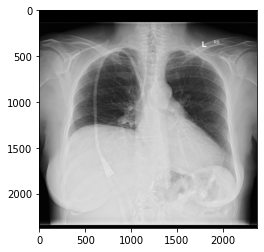

In [10]:
plt.imshow(img_read)

In [11]:
img_preprocess = preprocess_image(img_read)

Setting XRayResizer engine to cv2 could increase performance.


In [12]:
img_preprocess.shape

(1, 224, 224)

In [13]:
#plt.imshow(image_preprocess)

In [14]:
image_cv = cv2.imread(img_path)
(h,w) = image_cv.shape[:2]
#image_cv = cv2.resize(image_cv,(224,224))


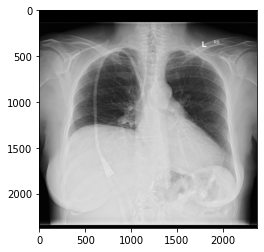

In [15]:
plt.imshow(image_cv)

In [16]:
image_cv.shape

(2373, 2373, 3)

In [17]:
img_preprocess_cv = preprocess_image(image_cv)

Setting XRayResizer engine to cv2 could increase performance.


In [18]:
img_preprocess_cv.shape

(1, 224, 224)

In [17]:
#plt.imshow(img_preprocess_cv)

In [18]:
#with torch.no_grad():
#    img = torch.from_numpy(img).unsqueeze(0)

In [51]:
#full_frame()
#plt.imshow(img[0][0].detach(), cmap="gray");
#ax.imshow(blurred, alpha=0.5)

In [26]:
model_urls = {}
weights = "all_cropped_relabelled-nih"

In [27]:
model_urls['all_cropped_relabelled-nih'] = {
    "weights_url":
    'https://github.com/mlmed/torchxrayvision/releases/download/v1/nih-pc-chex-mimic_ch-google-openi-kaggle-cropped_nih-relabelled-densenet121-d121-tw-lr001-rot45-tr15-sc15-seed0-best.pt',
    "op_threshs": [
        0.13560742, 0.02991982, 0.06174025, 0.014039013, 0.019905714,
        0.008344778, 0.0050125644, 0.23376009, 0.033579156, 0.027059183,
        0.08103119, 0.032318622, 0.008956448, 0.0145371305, 0.031112017,
        0.027753208, 0.21647574, 0.020804506
    ],
    "ppv80_thres": [
        0.99205583, 0.9994222, 0.5774489, 0.91806686, 0.9397316, 0.59545475,
        0.4620306, 0.95300055, 0.97363055, 0.80257887, 0.9619141, 0.8769196,
        0.9997837, 0.84948593, 0.9999691, 0.9993523, 0.90475833, 0.99867225
    ],
    "base":
    "train-cropped-relabelled-nih"
}

In [28]:
url = model_urls[weights]["weights_url"]
weights_filename = os.path.basename(url)
weights_storage_folder = os.path.expanduser(os.path.join("~", ".torchxrayvision", "models_data",
             model_urls[weights]["base"]))
weights_filename_local = os.path.expanduser(os.path.join(weights_storage_folder, weights_filename))

In [30]:
url

'https://github.com/mlmed/torchxrayvision/releases/download/v1/nih-pc-chex-mimic_ch-google-openi-kaggle-cropped_nih-relabelled-densenet121-d121-tw-lr001-rot45-tr15-sc15-seed0-best.pt'

In [31]:
weights_filename

'nih-pc-chex-mimic_ch-google-openi-kaggle-cropped_nih-relabelled-densenet121-d121-tw-lr001-rot45-tr15-sc15-seed0-best.pt'

In [32]:
weights_storage_folder

'/root/.torchxrayvision/models_data/train-cropped-relabelled-nih'

In [33]:
weights_filename_local

'/root/.torchxrayvision/models_data/train-cropped-relabelled-nih/nih-pc-chex-mimic_ch-google-openi-kaggle-cropped_nih-relabelled-densenet121-d121-tw-lr001-rot45-tr15-sc15-seed0-best.pt'

In [ ]:
chex-nih-mimic_nb-mimic_ch-pc-google-openi-kaggle-densenet121-model_2_cropped_relabel-nih-best.pt

# Class Model

In [51]:
def op_norm(outputs, op_threshs):
    outputs_new = torch.zeros(outputs.shape, device=outputs.device)
    for i in range(len(outputs)):
        for t in range(len(outputs[0])):
            if (outputs[i,t]<op_threshs[t]):
                outputs_new[i,t] = outputs[i,t]/(op_threshs[t]*2) 
            else:
                outputs_new[i,t] = 1-((1-outputs[i,t])/((1-(op_threshs[t]))*2)) 
            
    return outputs_new

In [40]:
class PneumoniaSeverityNet(torch.nn.Module):
    def __init__(self):
        super(PneumoniaSeverityNet, self).__init__()
        self.model = xrv.models.DenseNet(weights="all")
        self.model.op_threshs = None
        self.theta_bias_geographic_extent = torch.from_numpy(
            np.asarray((0.8705248236656189, 3.4137437)))
        self.theta_bias_opacity = torch.from_numpy(
            np.asarray((0.5484423041343689, 2.5535977)))

    def forward(self, x):
        preds = self.model(x)
        preds = preds[0,
                      xrv.datasets.default_pathologies.index("Lung Opacity")]
        geographic_extent = preds * self.theta_bias_geographic_extent[
            0] + self.theta_bias_geographic_extent[1]
        opacity = preds * self.theta_bias_opacity[0] + self.theta_bias_opacity[
            1]
        geographic_extent = torch.clamp(geographic_extent, 0, 8)
        opacity = torch.clamp(opacity, 0, 6)
        return {"geographic_extent": geographic_extent, "opacity": opacity, "lung_opacity" : preds}

In [42]:
class PneumoniaSeverityNet(torch.nn.Module):
    def __init__(self, model_urls, model_name):
        super(PneumoniaSeverityNet, self).__init__()
        self.model = xrv.models.DenseNet(weights=model_name)
        self.model.op_threshs = None 
        self.theta_bias_geographic_extent = torch.from_numpy(
            np.asarray((0.8705248236656189, 3.4137437)))
        self.theta_bias_opacity = torch.from_numpy(
            np.asarray((0.5484423041343689, 2.5535977)))
        self.model_urls = model_urls
        self.model_name = model_name
    
    def op_norm(outputs,  op_threshs):
        outputs_new = torch.zeros(outputs.shape, device=outputs.device)
        for i in range(len(outputs)):
            for t in range(len(outputs[0])):
                if (outputs[i,t]<op_threshs[t]):
                    outputs_new[i,t] = outputs[i,t]/(op_threshs[t]*2) 
                else:
                    outputs_new[i,t] = 1-((1-outputs[i,t])/((1-(op_threshs[t]))*2)) 

        return outputs_new
    
    def forward(self, x):
        preds_all = self.model(x)
        preds_sigmoid = torch.sigmoid(preds_all)
        preds_ops = PneumoniaSeverityNet.op_norm(preds_sigmoid, self.model_urls[self.model_name]["op_threshs"])
        preds = preds_all[0,
                      xrv.datasets.default_pathologies.index("Lung Opacity")]
        geographic_extent = preds * self.theta_bias_geographic_extent[
            0] + self.theta_bias_geographic_extent[1]
        opacity = preds * self.theta_bias_opacity[0] + self.theta_bias_opacity[
            1]
        geographic_extent = torch.clamp(geographic_extent, 0, 8)
        opacity = torch.clamp(opacity, 0, 6)
        return {"radiological_findings" : preds_ops, "geographic_extent": geographic_extent, "opacity": opacity, "lung_opacity" :preds }
    

In [24]:
class PneumoniaSeverityNet_Parallel(torch.nn.Module):
    def __init__(self, model_urls, model_name ):
        super(PneumoniaSeverityNet_Parallel, self).__init__()
        #self.model = torch.nn.DataParallel(model)
        self.model = xrv.models.DenseNet(weights=None)
        self.model.op_threshs = None
        self.model = torch.nn.DataParallel(self.model)
        url = model_urls[model_name]["weights_url"]
        weights_filename = os.path.basename(url)
        weights_storage_folder = os.path.expanduser(os.path.join("~", ".torchxrayvision", "models_data", model_urls[model_name]["base"]))
        weights_filename_local = os.path.expanduser(os.path.join(weights_storage_folder, weights_filename))
        savedmodel = torch.load(weights_filename_local, map_location='cpu')
        self.model.load_state_dict(savedmodel.state_dict())
        self.model = self.model.cuda()
        self.theta_bias_geographic_extent = torch.from_numpy(
            np.asarray((0.8705248236656189, 3.4137437)))
        self.theta_bias_opacity = torch.from_numpy(
            np.asarray((0.5484423041343689, 2.5535977)))
        self.model_urls = model_urls
        self.model_name = model_name
        
    
    def op_norm(outputs,  op_threshs):
        outputs_new = torch.zeros(outputs.shape, device=outputs.device)
        for i in range(len(outputs)):
            for t in range(len(outputs[0])):
                if (outputs[i,t]<op_threshs[t]):
                    outputs_new[i,t] = outputs[i,t]/(op_threshs[t]*2) 
                else:
                    outputs_new[i,t] = 1-((1-outputs[i,t])/((1-(op_threshs[t]))*2)) 

        return outputs_new

    def forward(self, x):
        preds_all = self.model(x)
        preds_sigmoid = torch.sigmoid(preds_all)
        preds_ops = PneumoniaSeverityNet_Parallel.op_norm(preds_sigmoid, self.model_urls[self.model_name]["op_threshs"])
        preds = preds_all[0,
                      xrv.datasets.default_pathologies.index("Lung Opacity")]
        geographic_extent = preds * self.theta_bias_geographic_extent[
            0] + self.theta_bias_geographic_extent[1]
        opacity = preds * self.theta_bias_opacity[0] + self.theta_bias_opacity[
            1]
        geographic_extent = torch.clamp(geographic_extent, 0, 8)
        opacity = torch.clamp(opacity, 0, 6)
        return {"radiological_findings" : preds_ops, "geographic_extent": geographic_extent, "opacity": opacity}

In [41]:
model2 = PneumoniaSeverityNet()

In [18]:
model2_mod = PneumoniaSeverityNet(model_name="all_cropped_relabelled-nih")

In [43]:
model2_ops = PneumoniaSeverityNet(model_urls=model_urls, model_name="all")

In [25]:
model2_parallel = PneumoniaSeverityNet_Parallel(model_urls=model_urls, model_name="relabelled-nih")

In [44]:
# running on gpu


with torch.no_grad():
    img = torch.from_numpy(img_preprocess).unsqueeze(0)
    

img = img.cuda()
model2 = model2_ops.cuda()

img = img.requires_grad_()

outputs = model2(img)
#print(outputs[]\

In [45]:
outputs

{'radiological_findings': tensor([[0.5934, 0.2098, 0.5112, 0.1244, 0.0038, 0.5016, 0.5530, 0.2678, 0.0361,
          0.5061, 0.5128, 0.5053, 0.5004, 0.0499, 0.0027, 0.5026, 0.4088, 0.0968]],
        device='cuda:0', grad_fn=<CopySlices>),
 'geographic_extent': tensor(2.0034, device='cuda:0', dtype=torch.float64, grad_fn=<ClampBackward>),
 'opacity': tensor(1.6651, device='cuda:0', dtype=torch.float64, grad_fn=<ClampBackward>),
 'lung_opacity': tensor(-1.6201, device='cuda:0', grad_fn=<SelectBackward>)}

In [46]:
outputs["radiological_findings"], type(outputs["radiological_findings"]), len(outputs["radiological_findings"]), outputs["radiological_findings"].dtype, outputs["radiological_findings"].s

tensor([[0.5934, 0.2098, 0.5112, 0.1244, 0.0038, 0.5016, 0.5530, 0.2678, 0.0361,
         0.5061, 0.5128, 0.5053, 0.5004, 0.0499, 0.0027, 0.5026, 0.4088, 0.0968]],
       device='cuda:0', grad_fn=<CopySlices>)

In [72]:
# running on gpu


with torch.no_grad():
    img = torch.from_numpy(img_preprocess).unsqueeze(0)
    

img = img.cuda()
model2 = model2_mod_op.cuda()

img = img.requires_grad_()

outputs_ops = model2(img)
#print(outputs[]\

In [73]:
outputs_ops

{'radiological_findings': tensor([[ 2.0872e-01, -3.4075e+00, -4.7449e+00, -1.0210e+00, -4.1136e+00,
          -5.5688e+00, -3.8552e+00,  9.9978e-01, -2.8157e+00, -2.2473e+00,
           9.8087e-01, -5.0600e+00, -3.7155e+00,  2.7193e-03, -2.5021e+00,
          -2.0166e+00, -8.2169e-01, -6.7270e-01]], device='cuda:0',
        grad_fn=<AddmmBackward>),
 'radiological_findings_ops': tensor([[ 5.4229e-01, -5.6944e+01, -3.8426e+01, -3.6365e+01, -1.0333e+02,
          -3.3367e+02, -3.8455e+02,  9.9985e-01, -4.1926e+01, -4.1525e+01,
           9.8959e-01, -7.8284e+01, -2.0742e+02,  9.3529e-02, -4.0212e+01,
          -3.6332e+01, -1.8979e+00, -1.6167e+01]], device='cuda:0',
        grad_fn=<CopySlices>),
 'geographic_extent': tensor(2.6984, device='cuda:0', dtype=torch.float64, grad_fn=<ClampBackward>),
 'opacity': tensor(2.1029, device='cuda:0', dtype=torch.float64, grad_fn=<ClampBackward>)}

In [26]:
# running on gpu


with torch.no_grad():
    img = torch.from_numpy(img_preprocess).unsqueeze(0)
    

img = img.cuda()
model2 = model2_parallel.cuda()

img = img.requires_grad_()

outputs_parallel = model2(img)

In [27]:
outputs_parallel

{'radiological_findings': tensor([[0.2668, 0.1235, 0.3321, 0.0826, 0.0107, 0.2055, 0.0494, 0.0448, 0.2163,
          0.2934, 0.0744, 0.2783, 0.1119, 0.0136, 0.0906, 0.2975, 0.2450, 0.0916]],
        device='cuda:0', grad_fn=<CopySlices>),
 'geographic_extent': tensor(1.2188, device='cuda:0', dtype=torch.float64, grad_fn=<ClampBackward>),
 'opacity': tensor(1.1708, device='cuda:0', dtype=torch.float64, grad_fn=<ClampBackward>)}

In [50]:
outputs

{'radiological_findings': tensor([[-3.2628, -5.6398, -3.0510, -6.1185, -7.7892, -6.2425, -6.6361, -4.9436,
          -4.1602, -4.7058, -4.1160, -3.7235, -5.3145, -7.0796, -4.7243, -3.6936,
          -2.2960, -4.2793]], device='cuda:0', grad_fn=<GatherBackward>),
 'geographic_extent': tensor(1.4150, device='cuda:0', dtype=torch.float64, grad_fn=<ClampBackward>),
 'opacity': tensor(1.2944, device='cuda:0', dtype=torch.float64, grad_fn=<ClampBackward>)}

In [20]:
outputs

{'radiological_findings': tensor([[ 2.0872e-01, -3.4075e+00, -4.7449e+00, -1.0210e+00, -4.1136e+00,
          -5.5688e+00, -3.8552e+00,  9.9978e-01, -2.8157e+00, -2.2473e+00,
           9.8087e-01, -5.0600e+00, -3.7155e+00,  2.7193e-03, -2.5021e+00,
          -2.0166e+00, -8.2169e-01, -6.7270e-01]], device='cuda:0',
        grad_fn=<AddmmBackward>),
 'geographic_extent': tensor(2.6984, device='cuda:0', dtype=torch.float64, grad_fn=<ClampBackward>),
 'opacity': tensor(2.1029, device='cuda:0', dtype=torch.float64, grad_fn=<ClampBackward>)}

In [31]:
outputs

{'radiological_findings': tensor([[ 0.1175, -2.3543, -3.6581, -3.6807, -3.7928, -5.7007, -4.8714,  0.4478,
          -2.9942, -3.4796,  0.3290, -2.1236, -1.6208, -4.1458, -0.7323, -0.0575,
          -0.5799,  1.7319]], device='cuda:0', grad_fn=<AddmmBackward>),
 'geographic_extent': tensor(2.9090, device='cuda:0', dtype=torch.float64, grad_fn=<ClampBackward>),
 'opacity': tensor(2.2356, device='cuda:0', dtype=torch.float64, grad_fn=<ClampBackward>)}

# Inference Radiological Findings

In [88]:
with torch.no_grad():
    img = torch.from_numpy(img).unsqueeze(0)
    if cuda:
        img = img.cuda()
        model2 = model2.cuda()

    outputs = model2(img)
    print("geographic_extent (0-8):",
          "{:1.4}".format(outputs["geographic_extent"].cpu().numpy()))
    print("opacity (0-6):", "{:1.4}".format(outputs["opacity"].cpu().numpy()))


geographic_extent (0-8): 2.003
opacity (0-6): 1.665


In [168]:
# running on cpu
with torch.no_grad():
    img = torch.from_numpy(img).unsqueeze(0)
    if cuda:
        img = img.cuda()
        model2_mod = model2_mod.cuda()

    outputs = model2_mod(img)
    print("geographic_extent (0-8):",
          "{:1.4}".format(outputs["geographic_extent"].cpu().numpy()))
    print("opacity (0-6):", "{:1.4}".format(outputs["opacity"].cpu().numpy()))
    print(outputs["radiological_findings"].cpu().numpy())
    
    #print("radiological_findings:", "{}".format(outputs["radiological_findings"].cpu().numpy()))


geographic_extent (0-8): 2.003
opacity (0-6): 1.665
[[-1.1142586 -4.1147203 -2.0086193 -6.0130587 -8.61403   -5.2157536
  -2.04143   -2.837944  -5.491379  -3.2115002 -2.5174787 -3.3378117
  -3.8788576 -5.4497595 -8.167226  -3.15348   -1.6200836 -4.6252756]]


In [7]:
# running on gpu
with torch.no_grad():
    img = torch.from_numpy(img).unsqueeze(0)
    if cuda:
        img = img.cuda()
        model2_mod = model2_mod.cuda()

    outputs = model2_mod(img)
    print("geographic_extent (0-8):",
          "{:1.4}".format(outputs["geographic_extent"]))
    print("opacity (0-6):", "{:1.4}".format(outputs["opacity"]))
    print(outputs["radiological_findings"])
    
    #print("rad

geographic_extent (0-8): 2.003
opacity (0-6): 1.665
tensor([[-1.1143, -4.1147, -2.0086, -6.0131, -8.6140, -5.2158, -2.0414, -2.8379,
         -5.4914, -3.2115, -2.5175, -3.3378, -3.8789, -5.4498, -8.1672, -3.1535,
         -1.6201, -4.6253]], device='cuda:0')


In [200]:
geo_extent = outputs["geographic_extent"]

In [201]:
geo_extent.cpu().numpy()

array(2.00342074)

In [ ]:
# run on cpu

In [169]:
out = outputs["radiological_findings"].cpu().numpy()
out_lung_op = out[0,xrv.datasets.default_pathologies.index("Lung Opacity")]
out_ate = out[0,xrv.datasets.default_pathologies.index("Atelectasis")]
out_hehe = out[0]

out_tensor = torch.from_numpy(out)
out, out_lung_op, out_ate, out_hehe

(array([[-1.1142586, -4.1147203, -2.0086193, -6.0130587, -8.61403  ,
         -5.2157536, -2.04143  , -2.837944 , -5.491379 , -3.2115002,
         -2.5174787, -3.3378117, -3.8788576, -5.4497595, -8.167226 ,
         -3.15348  , -1.6200836, -4.6252756]], dtype=float32),
 -1.6200836,
 -1.1142586,
 array([-1.1142586, -4.1147203, -2.0086193, -6.0130587, -8.61403  ,
        -5.2157536, -2.04143  , -2.837944 , -5.491379 , -3.2115002,
        -2.5174787, -3.3378117, -3.8788576, -5.4497595, -8.167226 ,
        -3.15348  , -1.6200836, -4.6252756], dtype=float32))

In [170]:
out = torch.sigmoid(out_tensor)
out

tensor([[2.4708e-01, 1.6068e-02, 1.1830e-01, 2.4406e-03, 1.8151e-04, 5.4010e-03,
         1.1492e-01, 5.5308e-02, 4.1052e-03, 3.8735e-02, 7.4642e-02, 3.4297e-02,
         2.0256e-02, 4.2789e-03, 2.8372e-04, 4.0954e-02, 1.6519e-01, 9.7058e-03]])

In [ ]:
# run on gpu

In [187]:
out = outputs["radiological_findings"]
out_lung_op = out[0,xrv.datasets.default_pathologies.index("Lung Opacity")]
out_ate = out[0,xrv.datasets.default_pathologies.index("Atelectasis")]
out_hehe = out[0]

#out_tensor = torch.from_numpy(out)
out, out_lung_op, out_ate, out_hehe

(tensor([[-1.1143, -4.1147, -2.0086, -6.0131, -8.6140, -5.2158, -2.0414, -2.8379,
          -5.4914, -3.2115, -2.5175, -3.3378, -3.8789, -5.4498, -8.1672, -3.1535,
          -1.6201, -4.6253]], device='cuda:0'),
 tensor(-1.6201, device='cuda:0'),
 tensor(-1.1143, device='cuda:0'),
 tensor([-1.1143, -4.1147, -2.0086, -6.0131, -8.6140, -5.2158, -2.0414, -2.8379,
         -5.4914, -3.2115, -2.5175, -3.3378, -3.8789, -5.4498, -8.1672, -3.1535,
         -1.6201, -4.6253], device='cuda:0'))

In [191]:
out.cpu().numpy(), out_lung_op.cpu().numpy(), out_ate.cpu().numpy()

(array([[-1.1142586, -4.1147203, -2.0086193, -6.0130587, -8.61403  ,
         -5.2157536, -2.04143  , -2.837944 , -5.491379 , -3.2115002,
         -2.5174787, -3.3378117, -3.8788576, -5.4497595, -8.167226 ,
         -3.15348  , -1.6200836, -4.6252756]], dtype=float32),
 array(-1.6200836, dtype=float32),
 array(-1.1142586, dtype=float32))

# Creat HeatMap

# On Based Code

In [358]:
with torch.no_grad():
    img = torch.from_numpy(img).unsqueeze(0)

TypeError: expected np.ndarray (got Tensor)

In [359]:
img

tensor([[[[ -765.9287,  -885.2097,  -885.6133,  ...,  -885.6133,
            -885.2097,  -765.9287],
          [ -885.2097, -1023.0668, -1023.5333,  ..., -1023.5333,
           -1023.0668,  -885.2097],
          [ -885.6133, -1023.5333, -1024.0000,  ..., -1024.0000,
           -1023.5333,  -885.6133],
          ...,
          [ -820.2287,  -947.8901,  -947.7562,  ...,  -970.9706,
            -969.7299,  -838.4018],
          [ -885.0701, -1022.9054, -1023.3706,  ..., -1023.4212,
           -1022.9526,  -885.1096],
          [ -765.9287,  -885.2097,  -885.6133,  ...,  -885.6133,
            -885.2097,  -765.9287]]]], requires_grad=True)

In [360]:
# based code
if saliency_path:
    if cuda:
        img = img.cuda()
        model2 = model2_mod.cuda()

    #img_req = img.requires_grad_()
    img_req = img
    outputs = model2_mod(img)
    print(outputs) 
    img_req = img_req.requires_grad_()
    grads = torch.autograd.grad(outputs["geographic_extent"].requires_grad_(), img_req)[0][0][0]
    

{'radiological_findings': tensor([[-1.1143, -4.1147, -2.0086, -6.0131, -8.6140, -5.2158, -2.0414, -2.8379,
         -5.4914, -3.2115, -2.5175, -3.3378, -3.8789, -5.4498, -8.1672, -3.1535,
         -1.6201, -4.6253]], grad_fn=<AddmmBackward>), 'geographic_extent': tensor(2.0034, dtype=torch.float64, grad_fn=<ClampBackward>), 'opacity': tensor(1.6651, dtype=torch.float64, grad_fn=<ClampBackward>)}


In [365]:
blurred = skimage.filters.gaussian(grads**2, sigma=(5, 5), truncate=3.5)
blurred

array([[6.8370000e-13, 8.2311621e-13, 9.7945230e-13, ..., 2.5959317e-12,
        2.2155370e-12, 1.8917320e-12],
       [8.1465151e-13, 9.7018205e-13, 1.1439497e-12, ..., 3.1728112e-12,
        2.7005386e-12, 2.2944448e-12],
       [9.7394889e-13, 1.1490514e-12, 1.3442023e-12, ..., 3.8626958e-12,
        3.2747800e-12, 2.7654762e-12],
       ...,
       [5.3245180e-13, 5.6963500e-13, 6.1538600e-13, ..., 6.3986326e-14,
        5.3744569e-14, 4.4159483e-14],
       [4.8831279e-13, 5.1744871e-13, 5.5398389e-13, ..., 5.6340474e-14,
        4.7436823e-14, 3.9064739e-14],
       [4.4415356e-13, 4.6585327e-13, 4.9373770e-13, ..., 4.8743781e-14,
        4.1161366e-14, 3.4003389e-14]], dtype=float32)

In [364]:
blurred.shape

(224, 224)

In [366]:
type(blurred)

numpy.ndarray

In [280]:
img

tensor([[[[ -765.9287,  -885.2097,  -885.6133,  ...,  -885.6133,
            -885.2097,  -765.9287],
          [ -885.2097, -1023.0668, -1023.5333,  ..., -1023.5333,
           -1023.0668,  -885.2097],
          [ -885.6133, -1023.5333, -1024.0000,  ..., -1024.0000,
           -1023.5333,  -885.6133],
          ...,
          [ -820.2287,  -947.8901,  -947.7562,  ...,  -970.9706,
            -969.7299,  -838.4018],
          [ -885.0701, -1022.9054, -1023.3706,  ..., -1023.4212,
           -1022.9526,  -885.1096],
          [ -765.9287,  -885.2097,  -885.6133,  ...,  -885.6133,
            -885.2097,  -765.9287]]]], requires_grad=True)

In [281]:
img_req

tensor([[[[ -765.9287,  -885.2097,  -885.6133,  ...,  -885.6133,
            -885.2097,  -765.9287],
          [ -885.2097, -1023.0668, -1023.5333,  ..., -1023.5333,
           -1023.0668,  -885.2097],
          [ -885.6133, -1023.5333, -1024.0000,  ..., -1024.0000,
           -1023.5333,  -885.6133],
          ...,
          [ -820.2287,  -947.8901,  -947.7562,  ...,  -970.9706,
            -969.7299,  -838.4018],
          [ -885.0701, -1022.9054, -1023.3706,  ..., -1023.4212,
           -1022.9526,  -885.1096],
          [ -765.9287,  -885.2097,  -885.6133,  ...,  -885.6133,
            -885.2097,  -765.9287]]]], requires_grad=True)

In [250]:
outputs

{'radiological_findings': tensor([[-1.1143, -4.1147, -2.0086, -6.0131, -8.6140, -5.2158, -2.0414, -2.8379,
          -5.4914, -3.2115, -2.5175, -3.3378, -3.8789, -5.4498, -8.1672, -3.1535,
          -1.6201, -4.6253]], grad_fn=<AddmmBackward>),
 'geographic_extent': tensor(2.0034, dtype=torch.float64, grad_fn=<ClampBackward>),
 'opacity': tensor(1.6651, dtype=torch.float64, grad_fn=<ClampBackward>)}

In [251]:
outputs["geographic_extent"]

tensor(2.0034, dtype=torch.float64, grad_fn=<ClampBackward>)

In [349]:
grads

tensor([[-1.7421e-08, -2.7107e-07,  3.9026e-07,  ...,  1.2678e-06,
         -3.8921e-07,  4.5950e-07],
        [ 1.2019e-07,  5.6518e-07,  2.6419e-07,  ..., -1.6624e-07,
         -2.3221e-07,  1.0109e-06],
        [-8.2569e-08, -9.2809e-08,  6.8117e-07,  ...,  4.2942e-07,
          4.2346e-07, -1.1587e-06],
        ...,
        [-9.8116e-07, -1.3416e-07, -1.4925e-06,  ...,  3.5833e-08,
         -2.6387e-08, -1.9443e-10],
        [-2.5058e-07, -3.2820e-07, -5.9270e-07,  ...,  1.1763e-07,
         -1.0961e-07,  4.6518e-08],
        [-5.3708e-07, -4.4621e-07, -3.8978e-07,  ...,  2.5138e-08,
          2.7170e-08,  7.4299e-08]], device='cuda:0')

In [367]:
type(grads)

torch.Tensor

In [362]:
grads.shape

torch.Size([224, 224])

In [279]:
blurred

array([[6.8370000e-13, 8.2311621e-13, 9.7945230e-13, ..., 2.5959317e-12,
        2.2155370e-12, 1.8917320e-12],
       [8.1465151e-13, 9.7018205e-13, 1.1439497e-12, ..., 3.1728112e-12,
        2.7005386e-12, 2.2944448e-12],
       [9.7394889e-13, 1.1490514e-12, 1.3442023e-12, ..., 3.8626958e-12,
        3.2747800e-12, 2.7654762e-12],
       ...,
       [5.3245180e-13, 5.6963500e-13, 6.1538600e-13, ..., 6.3986326e-14,
        5.3744569e-14, 4.4159483e-14],
       [4.8831279e-13, 5.1744871e-13, 5.5398389e-13, ..., 5.6340474e-14,
        4.7436823e-14, 3.9064739e-14],
       [4.4415356e-13, 4.6585327e-13, 4.9373770e-13, ..., 4.8743781e-14,
        4.1161366e-14, 3.4003389e-14]], dtype=float32)

In [363]:
blurred.shape

(224, 224)

# On CPU 

In [285]:
# run on cpu
with torch.no_grad():
    img = torch.from_numpy(img).unsqueeze(0)
if saliency_path:
    if cuda:
        img = img.cuda()
        model2 = model2_mod.cuda()

    img = img.requires_grad_()
    outputs = model2_mod(img)
    grads = torch.autograd.grad(outputs["geographic_extent"].requires_grad_(), img)[0][0][0]
    blurred = skimage.filters.gaussian(grads**2, sigma=(5, 5), truncate=3.5)

In [286]:
img

tensor([[[[ -765.9287,  -885.2097,  -885.6133,  ...,  -885.6133,
            -885.2097,  -765.9287],
          [ -885.2097, -1023.0668, -1023.5333,  ..., -1023.5333,
           -1023.0668,  -885.2097],
          [ -885.6133, -1023.5333, -1024.0000,  ..., -1024.0000,
           -1023.5333,  -885.6133],
          ...,
          [ -820.2287,  -947.8901,  -947.7562,  ...,  -970.9706,
            -969.7299,  -838.4018],
          [ -885.0701, -1022.9054, -1023.3706,  ..., -1023.4212,
           -1022.9526,  -885.1096],
          [ -765.9287,  -885.2097,  -885.6133,  ...,  -885.6133,
            -885.2097,  -765.9287]]]], requires_grad=True)

In [288]:
geo_extent = outputs["geographic_extent"].requires_grad_()
geo_extent

tensor(2.0034, dtype=torch.float64, grad_fn=<ClampBackward>)

In [290]:
blurred

array([[6.8370000e-13, 8.2311621e-13, 9.7945230e-13, ..., 2.5959317e-12,
        2.2155370e-12, 1.8917320e-12],
       [8.1465151e-13, 9.7018205e-13, 1.1439497e-12, ..., 3.1728112e-12,
        2.7005386e-12, 2.2944448e-12],
       [9.7394889e-13, 1.1490514e-12, 1.3442023e-12, ..., 3.8626958e-12,
        3.2747800e-12, 2.7654762e-12],
       ...,
       [5.3245180e-13, 5.6963500e-13, 6.1538600e-13, ..., 6.3986326e-14,
        5.3744569e-14, 4.4159483e-14],
       [4.8831279e-13, 5.1744871e-13, 5.5398389e-13, ..., 5.6340474e-14,
        4.7436823e-14, 3.9064739e-14],
       [4.4415356e-13, 4.6585327e-13, 4.9373770e-13, ..., 4.8743781e-14,
        4.1161366e-14, 3.4003389e-14]], dtype=float32)

In [294]:
img.shape

torch.Size([1, 1, 224, 224])

In [308]:
img_1 = img[0][0].requires_grad_().cpu().detach().numpy()
img_1

array([[ -765.9287 ,  -885.20966,  -885.61334, ...,  -885.61334,
         -885.20966,  -765.9287 ],
       [ -885.2097 , -1023.0668 , -1023.53326, ..., -1023.53326,
        -1023.0668 ,  -885.2097 ],
       [ -885.61334, -1023.53326, -1024.     , ..., -1024.     ,
        -1023.53326,  -885.61334],
       ...,
       [ -820.2287 ,  -947.8901 ,  -947.7562 , ...,  -970.97064,
         -969.7299 ,  -838.4018 ],
       [ -885.07007, -1022.9054 , -1023.3706 , ..., -1023.4212 ,
        -1022.95264,  -885.1096 ],
       [ -765.9287 ,  -885.20966,  -885.61334, ...,  -885.61334,
         -885.20966,  -765.9287 ]], dtype=float32)

In [13]:
from PIL import Image

img_1 = img[0][0].cpu().detach().numpy()
blurred

image_in = Image.fromarray(img_1)
image_saliency = Image.fromarray(blurred)

NameError: name 'blurred' is not defined

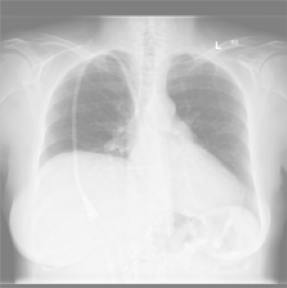

In [309]:
full_frame()
plt.imshow(img_1, cmap="gray", alpha=0.5)


In [310]:
blurred

array([[6.8370000e-13, 8.2311621e-13, 9.7945230e-13, ..., 2.5959317e-12,
        2.2155370e-12, 1.8917320e-12],
       [8.1465151e-13, 9.7018205e-13, 1.1439497e-12, ..., 3.1728112e-12,
        2.7005386e-12, 2.2944448e-12],
       [9.7394889e-13, 1.1490514e-12, 1.3442023e-12, ..., 3.8626958e-12,
        3.2747800e-12, 2.7654762e-12],
       ...,
       [5.3245180e-13, 5.6963500e-13, 6.1538600e-13, ..., 6.3986326e-14,
        5.3744569e-14, 4.4159483e-14],
       [4.8831279e-13, 5.1744871e-13, 5.5398389e-13, ..., 5.6340474e-14,
        4.7436823e-14, 3.9064739e-14],
       [4.4415356e-13, 4.6585327e-13, 4.9373770e-13, ..., 4.8743781e-14,
        4.1161366e-14, 3.4003389e-14]], dtype=float32)

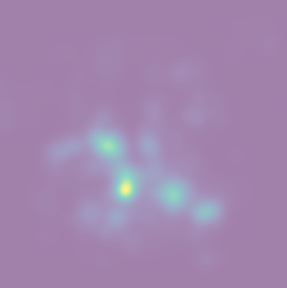

In [311]:
full_frame()
plt.imshow(blurred, alpha=0.5)


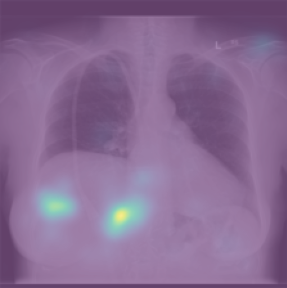

In [106]:
full_frame()
plt.imshow(img[0][0].cpu().detach().numpy(), cmap="gray", alpha=0.5)
plt.imshow(blurred, alpha=0.5)

# On GPU 

In [23]:
model = model2_mod.cuda()

In [15]:
# running on gpu



with torch.no_grad():
    img = torch.from_numpy(img).unsqueeze(0)


In [22]:
# running on gpu


with torch.no_grad():
    img = torch.from_numpy(img_preprocess).unsqueeze(0)
    

img = img.cuda()
model2 = model2_mod_first.cuda()

img = img.requires_grad_()

outputs = model2(img)
#print(outputs[]\
#geo_extent = outputs["geographic_extent"]
#geo_extent = geo_extent.cpu().detach().numpy()
#grads = torch.autograd.grad(geo_extent, img)[0][0][0]
    

In [117]:
# mimic_ch
#op_threshs = [0.09121389, 0.010573786, np.nan, 0.005023008, 0.003698257, np.nan, np.nan, 0.08001232, 0.037242252, np.nan, 0.05006329, np.nan, np.nan, np.nan, 0.019866971, 0.03823637, 0.11303808, 0.0069147074],
# all
op_threshs = [0.07422872, 0.038290843, 0.09814756, 0.0098118475, 0.023601074, 0.0022490358, 0.010060724, 0.103246614, 0.056810737, 0.026791653, 0.050318155, 0.023985857, 0.01939503, 0.042889766, 0.053369623, 0.035975814, 0.20204692, 0.05015312]


In [78]:
op_threshs

[0.07422872,
 0.038290843,
 0.09814756,
 0.0098118475,
 0.023601074,
 0.0022490358,
 0.010060724,
 0.103246614,
 0.056810737,
 0.026791653,
 0.050318155,
 0.023985857,
 0.01939503,
 0.042889766,
 0.053369623,
 0.035975814,
 0.20204692,
 0.05015312]

In [79]:
type(op_threshs)

list

In [80]:
def op_norm(outputs, op_threshs):
    outputs_new = torch.zeros(outputs.shape, device=outputs.device)
    for i in range(len(outputs)):
        for t in range(len(outputs[0])):
            if (outputs[i,t]<op_threshs[t]):
                outputs_new[i,t] = outputs[i,t]/(op_threshs[t]*2) 
            else:
                outputs_new[i,t] = 1-((1-outputs[i,t])/((1-(op_threshs[t]))*2)) 
            
    return outputs_new

In [23]:
outputs

{'radiological_findings': tensor([[ 0.1175, -2.3543, -3.6581, -3.6807, -3.7928, -5.7007, -4.8714,  0.4478,
          -2.9942, -3.4796,  0.3290, -2.1236, -1.6208, -4.1458, -0.7323, -0.0575,
          -0.5799,  1.7319]], device='cuda:0', grad_fn=<AddmmBackward>),
 'geographic_extent': tensor(2.9090, device='cuda:0', dtype=torch.float64, grad_fn=<ClampBackward>),
 'opacity': tensor(2.2356, device='cuda:0', dtype=torch.float64, grad_fn=<ClampBackward>)}

In [82]:
output_findings = outputs["radiological_findings"]

In [83]:
output_findings

tensor([[-1.1143, -4.1147, -2.0086, -6.0131, -8.6140, -5.2158, -2.0414, -2.8379,
         -5.4914, -3.2115, -2.5175, -3.3378, -3.8789, -5.4498, -8.1672, -3.1535,
         -1.6201, -4.6253]], device='cuda:0', grad_fn=<AddmmBackward>)

In [84]:
out_sigmoid = torch.sigmoid(output_findings)
out_sigmoid

tensor([[2.4708e-01, 1.6068e-02, 1.1830e-01, 2.4406e-03, 1.8151e-04, 5.4010e-03,
         1.1492e-01, 5.5308e-02, 4.1052e-03, 3.8735e-02, 7.4642e-02, 3.4297e-02,
         2.0256e-02, 4.2789e-03, 2.8372e-04, 4.0954e-02, 1.6519e-01, 9.7058e-03]],
       device='cuda:0', grad_fn=<SigmoidBackward>)

In [85]:
percent_of_sigmoid = out_sigmoid*100
percent_of_sigmoid

tensor([[2.4708e+01, 1.6068e+00, 1.1830e+01, 2.4406e-01, 1.8151e-02, 5.4010e-01,
         1.1492e+01, 5.5308e+00, 4.1052e-01, 3.8735e+00, 7.4642e+00, 3.4297e+00,
         2.0256e+00, 4.2789e-01, 2.8372e-02, 4.0954e+00, 1.6519e+01, 9.7058e-01]],
       device='cuda:0', grad_fn=<MulBackward0>)

In [86]:
out_op_threshs = op_norm(out_sigmoid, op_threshs)
out_op_threshs

tensor([[0.5934, 0.2098, 0.5112, 0.1244, 0.0038, 0.5016, 0.5530, 0.2678, 0.0361,
         0.5061, 0.5128, 0.5053, 0.5004, 0.0499, 0.0027, 0.5026, 0.4088, 0.0968]],
       device='cuda:0', grad_fn=<CopySlices>)

In [87]:
percent_of_ops_threshs = out_op_threshs*100
percent_of_ops_threshs

tensor([[59.3354, 20.9817, 51.1173, 12.4371,  0.3845, 50.1580, 55.2963, 26.7843,
          3.6131, 50.6136, 51.2806, 50.5282, 50.0439,  4.9883,  0.2658, 50.2582,
         40.8800,  9.6762]], device='cuda:0', grad_fn=<MulBackward0>)

In [92]:
with torch.no_grad():
    # define image annd model in gpu
    img = torch.from_numpy(img_preprocess_cv).unsqueeze(0)
    
img = img.cuda()
model2 = model2_mod.cuda()
#img = FastBaseTransform()(img.unsqueeze(0))
img = img.requires_grad_()

outputs = model2_mod(img)

In [99]:
img.shape

torch.Size([1, 1, 224, 224])

In [69]:
outputs

{'radiological_findings': tensor([[-2.2094, -1.6940, -1.5029, -3.5759, -5.9592, -3.7596, -2.2232, -1.2704,
          -4.1456, -1.9181, -4.5806, -2.9397, -0.3042, -7.2762, -2.4984, -3.5280,
           0.9807, -0.6563]], device='cuda:0', grad_fn=<AddmmBackward>),
 'geographic_extent': tensor(4.2675, device='cuda:0', dtype=torch.float64, grad_fn=<ClampBackward>),
 'opacity': tensor(3.0915, device='cuda:0', dtype=torch.float64, grad_fn=<ClampBackward>)}

In [181]:
print("after load image to model")
print(outputs)

# output radiological findings : Lung Opacity, Consolidation, Pneumonia, Infiltration
output_findings = outputs["radiological_findings"]
output_sigmoid = torch.sigmoid(output_findings)

print("after output_sigmoid")

out_lung_opacity = output_sigmoid[
    0, xrv.datasets.default_pathologies.index("Lung Opacity")]
out_consolidation = output_sigmoid[
    0, xrv.datasets.default_pathologies.index("Consolidation")]
out_pneumonia = output_sigmoid[
    0, xrv.datasets.default_pathologies.index("Pneumonia")]
out_infiltration = output_sigmoid[
    0, xrv.datasets.default_pathologies.index("Infiltration")]

out_lung_opacity = out_lung_opacity.cpu().detach().numpy()
out_consolidation = out_consolidation.cpu().detach().numpy()
out_pneumonia = out_pneumonia.cpu().detach().numpy()
out_infiltration = out_infiltration.cpu().detach().numpy()
# output severity : area of opacity and degree of opacity
print("after radiological findings")

area_op = outputs["geographic_extent"]
deg_op = outputs["opacity"]

print("after pneumonia severity")
# output saliency map : heatmap of pneumonia severity
#area_op_saliency = area_op.requires_grad_()


after load image to model
{'radiological_findings': tensor([[-2.2093, -1.6940, -1.5029, -3.5758, -5.9591, -3.7596, -2.2232, -1.2703,
         -4.1456, -1.9181, -4.5804, -2.9396, -0.3042, -7.2762, -2.4984, -3.5280,
          0.9807, -0.6562]], device='cuda:0', grad_fn=<AddmmBackward>), 'geographic_extent': tensor(4.2675, device='cuda:0', dtype=torch.float64, grad_fn=<ClampBackward>), 'opacity': tensor(3.0915, device='cuda:0', dtype=torch.float64, grad_fn=<ClampBackward>)}
after output_sigmoid
after radiological findings
after pneumonia severity


In [119]:
img

tensor([[[[-712.1519, -765.8649, -753.2164,  ..., -505.6017, -514.5600,
           -465.3788],
          [-730.9327, -808.7698, -798.1855,  ..., -526.4869, -528.5553,
           -465.0344],
          [-704.1196, -772.3271, -750.3226,  ..., -369.3554, -368.5600,
           -357.1478],
          ...,
          [ 395.9654,  488.1383,  541.9443,  ...,  680.2510,  664.1034,
            590.5713],
          [ 390.0197,  471.2682,  522.7174,  ...,  689.7271,  679.8658,
            585.5476],
          [ 355.9199,  428.2425,  472.2276,  ...,  602.7346,  600.4752,
            519.4819]]]], device='cuda:0', requires_grad=True)

In [100]:
img.requires_grad

True

In [104]:
print(img.grad_fn)

None


In [81]:
img.shape

torch.Size([1, 1, 224, 224])

In [80]:
type(img)

torch.Tensor

In [84]:
outputs["geographic_extent"]

tensor(4.2675, device='cuda:0', dtype=torch.float64, grad_fn=<ClampBackward>)

In [82]:
type(outputs["geographic_extent"])

torch.Tensor

In [83]:
outputs["geographic_extent"].shape

torch.Size([])

In [101]:
outputs["geographic_extent"].requires_grad

True

In [105]:
print(outputs["geographic_extent"].grad_fn)

In [120]:
print("image fill : ", img)
print("image shape : ", img.shape)
print("image type : ", type(img))
print("geographic_extent fill : ", outputs["geographic_extent"])
print("geographic_extent shape : ", outputs["geographic_extent"].shape)
print("geographic_extent type : ", type(outputs["geographic_extent"]))


image fill :  tensor([[[[-712.1519, -765.8649, -753.2164,  ..., -505.6017, -514.5600,
           -465.3788],
          [-730.9327, -808.7698, -798.1855,  ..., -526.4869, -528.5553,
           -465.0344],
          [-704.1196, -772.3271, -750.3226,  ..., -369.3554, -368.5600,
           -357.1478],
          ...,
          [ 395.9654,  488.1383,  541.9443,  ...,  680.2510,  664.1034,
            590.5713],
          [ 390.0197,  471.2682,  522.7174,  ...,  689.7271,  679.8658,
            585.5476],
          [ 355.9199,  428.2425,  472.2276,  ...,  602.7346,  600.4752,
            519.4819]]]], device='cuda:0', requires_grad=True)
image shape :  torch.Size([1, 1, 224, 224])
image type :  <class 'torch.Tensor'>
geographic_extent fill :  tensor(2.8628, device='cuda:0', dtype=torch.float64, grad_fn=<ClampBackward>)
geographic_extent shape :  torch.Size([])
geographic_extent type :  <class 'torch.Tensor'>


In [182]:

grads = torch.autograd.grad(outputs["geographic_extent"], img)[0][0][0]

grads_num = grads.cpu().detach().numpy()

grad_tensor = torch.from_numpy(grads_num).float().to("cpu")

blurred = skimage.filters.gaussian(grad_tensor**2,
                                   sigma=(5, 5),
                                   truncate=3.5)

In [101]:

grads = torch.autograd.grad(outputs_parallel["geographic_extent"], img)[0][0][0]

grads_num = grads.cpu().detach().numpy()

grad_tensor = torch.from_numpy(grads_num).float().to("cpu")

blurred = skimage.filters.gaussian(grad_tensor**2,
                                   sigma=(5, 5),
                                   truncate=3.5)

In [102]:
blurred

array([[8.82376718e-14, 1.00030620e-13, 1.12690646e-13, ...,
        1.13929209e-14, 9.48191890e-15, 7.79575836e-15],
       [1.00726034e-13, 1.13902851e-13, 1.28020072e-13, ...,
        1.57049954e-14, 1.30888257e-14, 1.07700138e-14],
       [1.15555650e-13, 1.30696316e-13, 1.46913054e-13, ...,
        2.12364136e-14, 1.77185435e-14, 1.45897326e-14],
       ...,
       [1.52604370e-13, 1.68196620e-13, 1.82977534e-13, ...,
        2.36641761e-14, 1.99091554e-14, 1.63078406e-14],
       [1.35857132e-13, 1.49659365e-13, 1.62593802e-13, ...,
        1.94185352e-14, 1.63493622e-14, 1.34076642e-14],
       [1.19583637e-13, 1.31605867e-13, 1.42694152e-13, ...,
        1.56683070e-14, 1.32028686e-14, 1.08431813e-14]], dtype=float32)

In [123]:
blurred.shape

(224, 224)

In [93]:
type(blurred)

numpy.ndarray

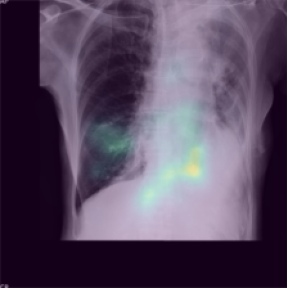

In [184]:
full_frame()
plt.imshow(img[0][0].cpu().detach(), cmap="gray")
plt.imshow(blurred, alpha=0.3)
plt.savefig("saliency_buffer.png")

In [185]:
img_saliency_buffer = cv2.imread("saliency_buffer.png")
(h,w) = img_saliency_buffer.shape[:2]
print(h,w)
#image_cv = cv2.resize(image_cv,(224,224))


288 432


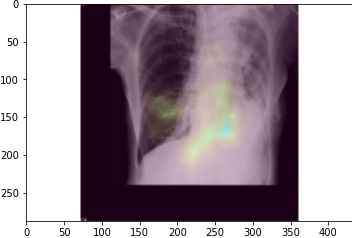

In [190]:
plt.imshow(img_saliency_buffer)

In [191]:
x = 72
w = 360
y = 0
h = 288

In [192]:
crop_saliency_buffer = img_saliency_buffer[y:h, x:w]

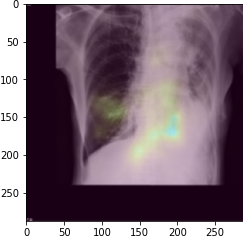

In [193]:
plt.imshow(crop_saliency_buffer)

In [194]:
width_resize = 512
height_resize = 512
dim_resize = (width_resize, height_resize)

In [195]:
resize_saliency_buffer = cv2.resize(crop_saliency_buffer, dim_resize, interpolation = cv2.INTER_AREA)

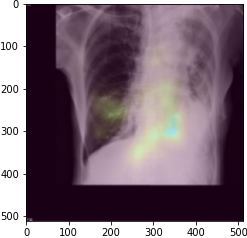

In [196]:
plt.imshow(resize_saliency_buffer)

In [138]:
# saving image
cv2.imwrite('saliency_image.png', resize_saliency_buffer) 

True

In [167]:
#import math
#grads_s = torch.autograd.grad(outputs["geographic_extent"], img)[0][0][0]
#grads_num_s = grads.cpu().detach().numpy()
#grad_tensor_s = torch.from_numpy(grads_num).float().to("cpu")
#blurred_s = skimage.filters.gaussian(math.sqrt(grad_tensor_s),
#                                   sigma=(5, 5),
#                                   truncate=3.5)

In [20]:

img = img.cuda()
model2 = model2_mod.cuda()
#img = img.requires_grad_()

outputs = model2(img)
#print(outputs[]\
geo_extent = outputs["geographic_extent"].requires_grad_()
#geo_extent = geo_extent.cpu().detach().numpy()
grads = torch.autograd.grad(geo_extent, img.requires_grad_())[0][0][0]

In [26]:
geo_ext = outputs["geographic_extent"]
geo_ext = geo_ext.cpu().detach().numpy()
geo_ext

array(0.)

In [27]:
deg_opa = outputs["opacity"]
deg_opa = deg_opa.cpu().detach().numpy()
deg_opa

array(0.04151048)

In [166]:
#grads

In [14]:
output_findings = outputs["radiological_findings"]

In [15]:
output_sigmoid = torch.sigmoid(output_findings)

In [16]:
output_sigmoid

tensor([[2.0126e-02, 6.2529e-03, 1.1158e-01, 6.2827e-03, 2.3581e-05, 2.2283e-03,
         1.8739e-02, 1.2948e-02, 7.6606e-04, 7.9914e-03, 3.3525e-04, 7.2872e-03,
         7.2085e-03, 6.6246e-04, 2.5772e-03, 7.8769e-03, 2.0490e-02, 3.2194e-03]],
       device='cuda:0', grad_fn=<SigmoidBackward>)

In [17]:
output_sigmoid = output_sigmoid.cpu().detach().numpy()

In [18]:
output_sigmoid

array([[2.0125516e-02, 6.2528867e-03, 1.1158015e-01, 6.2827053e-03,
        2.3580689e-05, 2.2282656e-03, 1.8739020e-02, 1.2948385e-02,
        7.6606497e-04, 7.9914005e-03, 3.3524784e-04, 7.2871866e-03,
        7.2084740e-03, 6.6246092e-04, 2.5772254e-03, 7.8768823e-03,
        2.0489765e-02, 3.2193735e-03]], dtype=float32)

In [19]:
out_lung_op = output_sigmoid[0,xrv.datasets.default_pathologies.index("Lung Opacity")]
out_lung_op

0.020489765

In [20]:
out_consolidation = output_sigmoid[0,xrv.datasets.default_pathologies.index("Consolidation")]
out_consolidation

0.0062528867

In [21]:
out_pneumonia = output_sigmoid[0,xrv.datasets.default_pathologies.index("Pneumonia")]
out_pneumonia

0.000766065

In [22]:
out_infiltration = output_sigmoid[0,xrv.datasets.default_pathologies.index("Infiltration")]
out_infiltration

0.11158015

In [23]:
out_atelectasis = output_sigmoid[0,xrv.datasets.default_pathologies.index("Atelectasis")]
out_atelectasis

0.020125516

In [167]:
def output(out_lung_op, out_consolidation, out_pneumonia, out_atelectasis, geo_ext, deg_opa, saliency_path) :
    
    radiological_findigs = []
    radiological_findigs.append([out_lung_op, out_consolidation, out_pneumonia, out_atelectasis])
    severity = []
    severity.append([geo_ext, deg_opa])
    saliency_path
    
    return radiological_findigs, severity, saliency_path


In [168]:
out = output(out_lung_op, out_consolidation, out_pneumonia, out_atelectasis, geo_ext, deg_opa, saliency_path)

In [165]:
#out[0][1]

In [170]:
out[1][0][1]

array(3.09145635)

In [128]:
grads.shape

torch.Size([224, 224])

In [129]:
grads.cpu()

tensor([[ 6.0468e-09, -1.8360e-07,  9.7785e-09,  ..., -3.2958e-07,
          4.4002e-07,  1.8657e-07],
        [-3.5300e-07, -1.9403e-07, -2.2542e-07,  ...,  9.3602e-08,
          1.0013e-07,  2.2954e-07],
        [-1.5497e-07, -2.4021e-07, -6.9963e-08,  ..., -5.5060e-07,
          1.8047e-07,  2.7673e-07],
        ...,
        [-3.6317e-08,  3.8241e-08,  9.5883e-08,  ...,  1.3707e-07,
         -1.5036e-07, -8.0022e-08],
        [ 1.0121e-07, -9.9583e-08, -1.2047e-07,  ...,  9.9161e-09,
         -7.8936e-08, -1.0497e-07],
        [ 1.0270e-08, -9.6335e-08, -7.9694e-08,  ..., -5.7210e-08,
         -5.2634e-08, -4.2312e-08]])

In [24]:
grads_num = grads.cpu().detach().numpy()
grads_num

array([[-1.50368749e-07,  1.88067393e-08, -3.02181142e-08, ...,
        -4.86091949e-08, -1.20741760e-07, -1.36170712e-07],
       [-1.53153024e-07, -7.38694936e-08, -7.24107991e-08, ...,
        -3.46017600e-07, -1.91446446e-07, -6.29043342e-08],
       [-1.03020184e-07, -2.26263012e-07,  6.44047873e-08, ...,
        -2.72654574e-07, -1.96209093e-09, -9.29958759e-08],
       ...,
       [-9.34127016e-08, -1.07237497e-07, -1.91394420e-07, ...,
        -3.40635779e-07,  1.96036495e-07,  1.13844727e-07],
       [-4.89130656e-08,  3.46543594e-08, -1.01101655e-07, ...,
        -1.53547060e-08,  5.60820261e-08,  1.19876063e-07],
       [-2.03853588e-07, -6.51603784e-08,  5.52419532e-09, ...,
         4.60720422e-08,  6.47553406e-08,  1.06400499e-07]], dtype=float32)

In [25]:
#device = "cpu"
grad_tensor = torch.from_numpy(grads_num).float().to("cpu")
grad_tensor

tensor([[-1.5037e-07,  1.8807e-08, -3.0218e-08,  ..., -4.8609e-08,
         -1.2074e-07, -1.3617e-07],
        [-1.5315e-07, -7.3869e-08, -7.2411e-08,  ..., -3.4602e-07,
         -1.9145e-07, -6.2904e-08],
        [-1.0302e-07, -2.2626e-07,  6.4405e-08,  ..., -2.7265e-07,
         -1.9621e-09, -9.2996e-08],
        ...,
        [-9.3413e-08, -1.0724e-07, -1.9139e-07,  ..., -3.4064e-07,
          1.9604e-07,  1.1384e-07],
        [-4.8913e-08,  3.4654e-08, -1.0110e-07,  ..., -1.5355e-08,
          5.6082e-08,  1.1988e-07],
        [-2.0385e-07, -6.5160e-08,  5.5242e-09,  ...,  4.6072e-08,
          6.4755e-08,  1.0640e-07]])

In [26]:
blurred = skimage.filters.gaussian(grad_tensor**2, sigma=(5, 5), truncate=3.5)

In [27]:
blurred

array([[5.5534323e-14, 6.8468411e-14, 8.4427684e-14, ..., 5.3798769e-14,
        4.7698716e-14, 4.1740747e-14],
       [6.3095166e-14, 7.8589092e-14, 9.7665955e-14, ..., 5.1159591e-14,
        4.5429924e-14, 3.9832917e-14],
       [7.1591868e-14, 8.9917582e-14, 1.1245109e-13, ..., 4.8467886e-14,
        4.3056223e-14, 3.7792330e-14],
       ...,
       [3.1827646e-14, 3.5022786e-14, 3.9515913e-14, ..., 1.4631096e-13,
        1.1534579e-13, 8.9712817e-14],
       [3.1619018e-14, 3.4361542e-14, 3.8354133e-14, ..., 1.3558860e-13,
        1.0664040e-13, 8.2762200e-14],
       [3.1486078e-14, 3.3802642e-14, 3.7325950e-14, ..., 1.2511460e-13,
        9.8194144e-14, 7.6069915e-14]], dtype=float32)

In [208]:
type(img)

torch.Tensor

In [106]:
img.shape

torch.Size([1, 1, 224, 224])

In [105]:
type(blurred)


numpy.ndarray

In [104]:
blurred.shape

(224, 224)

In [28]:
img_1 = img[0][0].cpu().detach().numpy()
img_1

array([[  575.98804 ,   553.95294 ,   476.21085 , ...,   707.6394  ,
          749.64386 ,   635.7872  ],
       [   69.581955,  -129.58415 ,  -289.23984 , ...,   662.76465 ,
          701.6956  ,   602.09    ],
       [ -497.89127 ,  -739.8435  ,  -856.4801  , ...,   286.65598 ,
          376.36862 ,   372.0186  ],
       ...,
       [ -903.59766 , -1011.72626 , -1020.70013 , ..., -1007.761   ,
         -970.0077  ,  -801.89294 ],
       [ -903.2968  , -1011.657   , -1020.63257 , ..., -1005.2592  ,
         -966.26605 ,  -794.7786  ],
       [ -809.19507 ,  -906.95557 ,  -915.0048  , ...,  -899.6275  ,
         -861.81226 ,  -710.8045  ]], dtype=float32)

In [84]:
img_1.shape

(224, 224)

In [29]:
blurred

array([[5.5534323e-14, 6.8468411e-14, 8.4427684e-14, ..., 5.3798769e-14,
        4.7698716e-14, 4.1740747e-14],
       [6.3095166e-14, 7.8589092e-14, 9.7665955e-14, ..., 5.1159591e-14,
        4.5429924e-14, 3.9832917e-14],
       [7.1591868e-14, 8.9917582e-14, 1.1245109e-13, ..., 4.8467886e-14,
        4.3056223e-14, 3.7792330e-14],
       ...,
       [3.1827646e-14, 3.5022786e-14, 3.9515913e-14, ..., 1.4631096e-13,
        1.1534579e-13, 8.9712817e-14],
       [3.1619018e-14, 3.4361542e-14, 3.8354133e-14, ..., 1.3558860e-13,
        1.0664040e-13, 8.2762200e-14],
       [3.1486078e-14, 3.3802642e-14, 3.7325950e-14, ..., 1.2511460e-13,
        9.8194144e-14, 7.6069915e-14]], dtype=float32)

In [85]:
blurred.shape

(224, 224)

In [77]:
blurred * 255

array([[1.4161252e-11, 1.7459445e-11, 2.1529060e-11, ..., 1.3718682e-11,
        1.2163170e-11, 1.0643888e-11],
       [1.6089267e-11, 2.0040218e-11, 2.4904816e-11, ..., 1.3045692e-11,
        1.1584628e-11, 1.0157391e-11],
       [1.8255926e-11, 2.2928982e-11, 2.8675026e-11, ..., 1.2359308e-11,
        1.0979335e-11, 9.6370412e-12],
       ...,
       [8.1160443e-12, 8.9308057e-12, 1.0076553e-11, ..., 3.7309277e-11,
        2.9413163e-11, 2.2876758e-11],
       [8.0628447e-12, 8.7621880e-12, 9.7802998e-12, ..., 3.4575082e-11,
        2.7193291e-11, 2.1104353e-11],
       [8.0289430e-12, 8.6196683e-12, 9.5181120e-12, ..., 3.1904212e-11,
        2.5039498e-11, 1.9397822e-11]], dtype=float32)

In [151]:
import numpy as np, cv2
#vis_img_1 = img_1
#vis_img_1 = cv2.cvtColor(vis_img_1, cv2.COLOR_BGR2LAB)

In [102]:
vis_img_1

array([[  575.98804 ,   553.95294 ,   476.21085 , ...,   707.6394  ,
          749.64386 ,   635.7872  ],
       [   69.581955,  -129.58415 ,  -289.23984 , ...,   662.76465 ,
          701.6956  ,   602.09    ],
       [ -497.89127 ,  -739.8435  ,  -856.4801  , ...,   286.65598 ,
          376.36862 ,   372.0186  ],
       ...,
       [ -903.59766 , -1011.72626 , -1020.70013 , ..., -1007.761   ,
         -970.0077  ,  -801.89294 ],
       [ -903.2968  , -1011.657   , -1020.63257 , ..., -1005.2592  ,
         -966.26605 ,  -794.7786  ],
       [ -809.19507 ,  -906.95557 ,  -915.0048  , ...,  -899.6275  ,
         -861.81226 ,  -710.8045  ]], dtype=float32)

In [103]:
#cv2.imshow("test", vis2)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

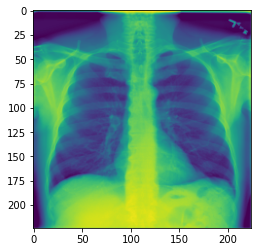

In [104]:
import cv2
from matplotlib import pyplot as plt


#Import image
#image = cv2.imread("input_path")

#Show the image with matplotlib
plt.imshow(vis_img_1)
plt.show()

In [150]:
import numpy as np, cv2
#vis_img_2 = blurred
#vis_img_2 = cv2.cvtColor(vis_img_2, cv2.COLOR_BGR2LAB)

In [115]:
vis_img_2

array([[5.5534323e-14, 6.8468411e-14, 8.4427684e-14, ..., 5.3798769e-14,
        4.7698716e-14, 4.1740747e-14],
       [6.3095166e-14, 7.8589092e-14, 9.7665955e-14, ..., 5.1159591e-14,
        4.5429924e-14, 3.9832917e-14],
       [7.1591868e-14, 8.9917582e-14, 1.1245109e-13, ..., 4.8467886e-14,
        4.3056223e-14, 3.7792330e-14],
       ...,
       [3.1827646e-14, 3.5022786e-14, 3.9515913e-14, ..., 1.4631096e-13,
        1.1534579e-13, 8.9712817e-14],
       [3.1619018e-14, 3.4361542e-14, 3.8354133e-14, ..., 1.3558860e-13,
        1.0664040e-13, 8.2762200e-14],
       [3.1486078e-14, 3.3802642e-14, 3.7325950e-14, ..., 1.2511460e-13,
        9.8194144e-14, 7.6069915e-14]], dtype=float32)

In [120]:
vis_img_2*10**17

array([[ 5553.43226646,  6846.84107371,  8442.76837569, ...,
         5379.87690963,  4769.8715637 ,  4174.07468724],
       [ 6309.51657566,  7858.90924278,  9766.59549133, ...,
         5115.95906155,  4542.99243352,  3983.2916967 ],
       [ 7159.1868447 ,  8991.75821149, 11245.10911905, ...,
         4846.78859276,  4305.62229208,  3779.23298938],
       ...,
       [ 3182.7645852 ,  3502.27862662,  3951.59131924, ...,
        14631.09554302, 11534.57890183,  8971.28169821],
       [ 3161.90182489,  3436.15415256,  3835.41329664, ...,
        13558.86025201, 10664.03977385,  8276.22001422],
       [ 3148.60781219,  3380.26420819,  3732.59501649, ...,
        12511.45996702,  9819.41443304,  7606.99147987]])

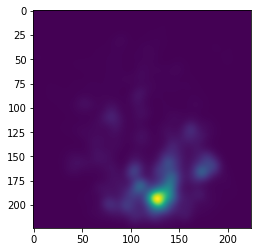

In [121]:
import cv2
from matplotlib import pyplot as plt


#Import image
#image = cv2.imread("input_path")

#Show the image with matplotlib
plt.imshow(vis_img_2)
plt.show()

In [126]:
concate_result = cv2.addWeighted(vis_img_1, 0.4, vis_img_2, 0.6, 0.0)


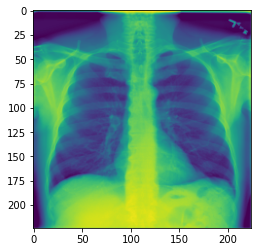

In [127]:
import cv2
from matplotlib import pyplot as plt


#Import image
#image = cv2.imread("input_path")

#Show the image with matplotlib
plt.imshow(concate_result)
plt.show()

In [138]:
cv2.imwrite("concate.png", concate_result) 


True

In [71]:
import numpy as np

In [72]:
im = np.array(img_1)

In [73]:
im

array([[  575.98804 ,   553.95294 ,   476.21085 , ...,   707.6394  ,
          749.64386 ,   635.7872  ],
       [   69.581955,  -129.58415 ,  -289.23984 , ...,   662.76465 ,
          701.6956  ,   602.09    ],
       [ -497.89127 ,  -739.8435  ,  -856.4801  , ...,   286.65598 ,
          376.36862 ,   372.0186  ],
       ...,
       [ -903.59766 , -1011.72626 , -1020.70013 , ..., -1007.761   ,
         -970.0077  ,  -801.89294 ],
       [ -903.2968  , -1011.657   , -1020.63257 , ..., -1005.2592  ,
         -966.26605 ,  -794.7786  ],
       [ -809.19507 ,  -906.95557 ,  -915.0048  , ...,  -899.6275  ,
         -861.81226 ,  -710.8045  ]], dtype=float32)

In [149]:
#img_1
blurred_pro = blurred * 0.3

#im_dec = np.concatenate((img_1, blurred_pro), axis=1)

#Image.fromarray(im_dec).save('numpy_dec_color.jpeg')

In [128]:
from PIL import Image



#image_in = Image.fromarray(img_1)
#image_saliency = Image.fromarray(blurred)

In [130]:
PIL_image = Image.fromarray(img_1)

In [131]:
PIL_image = PIL_image.convert("LA")

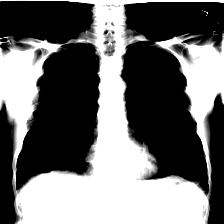

In [132]:
PIL_image

In [133]:
PIL_image = PIL_image.save("image_in.png") 

In [134]:
image_saliency = Image.fromarray(blurred)

In [146]:
#image_saliency.convert('LA')

In [144]:
#image_saliency

In [145]:
#image_in = image_in.save("image_in.jpg") 
#image_saliency = image_saliency.save("image_saliency.jpg")

In [ ]:
import matplotlib as mpl

In [ ]:
import matplotlib.pyplot as plt

In [159]:
def inference_all(img, model, saliency_path):

    # running on gpu
    with torch.no_grad():
        # define image annd model in gpu
        img = torch.from_numpy(img).unsqueeze(0)

    img = img.cuda()
    model = model.cuda()

    img = img.requires_grad_()

    outputs = model(img)

    # output radiological findings : Lung Opacity, Consolidation, Pneumonia, Infiltration
    output_findings = outputs["radiological_findings"]
    output_sigmoid = torch.sigmoid(output_findings)

    out_lung_opacity = output_sigmoid[
        0, xrv.datasets.default_pathologies.index("Lung Opacity")]
    out_consolidation = output_sigmoid[
        0, xrv.datasets.default_pathologies.index("Consolidation")]
    out_pneumonia = output_sigmoid[
        0, xrv.datasets.default_pathologies.index("Pneumonia")]
    out_infiltration = output_sigmoid[
        0, xrv.datasets.default_pathologies.index("Infiltration")]

    # output severity : area of opacity and degree of opacity
    area_op = outputs["geographic_extent"]
    deg_op = outputs["opacity"]

    # output saliency map : heatmap of pneumonia severity
    #area_op_saliency = area_op.requires_grad_()

    grads = torch.autograd.grad(outputs["geographic_extent"],
                                img)[0][0][0]
    grads_num = grads.cpu().detach().numpy()

    grad_tensor = torch.from_numpy(grads_num).float().to("cpu")

    blurred = skimage.filters.gaussian(grad_tensor**2,
                                       sigma=(5, 5),
                                       truncate=3.5)

    saliency_path = saving_saliency_result(img, blurred, saliency_path)

    return out_lung_opacity, out_consolidation, out_pneumonia, out_infiltration, area_op, deg_op, saliency_path



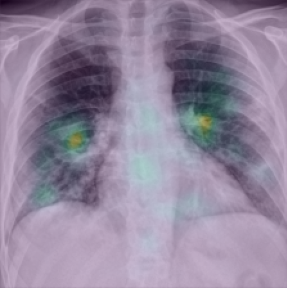

In [163]:
result = inference_all(img_preprocess, model2_mod, saliency_path)

In [164]:
result

(tensor(0.3469, device='cuda:0', grad_fn=<SelectBackward>),
 tensor(0.0329, device='cuda:0', grad_fn=<SelectBackward>),
 tensor(0.0211, device='cuda:0', grad_fn=<SelectBackward>),
 tensor(0.1553, device='cuda:0', grad_fn=<SelectBackward>),
 tensor(2.8628, device='cuda:0', dtype=torch.float64, grad_fn=<ClampBackward>),
 tensor(2.2065, device='cuda:0', dtype=torch.float64, grad_fn=<ClampBackward>),
 (True, 'saliency_result_1.png'))

In [26]:
plt.savefig(saliency_path)

<Figure size 432x288 with 0 Axes>

# Saving Inferenced Result

In [24]:
def saving_saliency_result_plt(img, blurred, saliency_path) :
    full_frame()
    my_dpi = 100
    fig = plt.figure(frameon=False,
                     figsize=(1024 / my_dpi, 1024 / my_dpi),
                     dpi=my_dpi)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(img[0][0].cpu().detach(), cmap="gray", aspect='auto')
    ax.imshow(blurred, alpha=0.3)
    plt.savefig(saliency_path)
    
    return True, saliency_path
    

In [162]:
def saving_saliency_result(img, blurred, saliency_path) :
    
    # getting buffer saliency image
    full_frame()
    plt.imshow(img[0][0].cpu().detach(), cmap="gray", aspect='auto')
    plt.imshow(blurred, alpha=0.3)
    plt.savefig("saliency_buffer.png")
    
    # read saliency buffer
    img_saliency_buffer = cv2.imread("saliency_buffer.png")
    (h,w) = img_saliency_buffer.shape[:2]
    
    x_crop = 72
    w_crop = 360
    y_crop = 0
    h_crop = 288
    
    crop_saliency_buffer = img_saliency_buffer[y_crop:h_crop, x_crop:w_crop]
    
    width_resize = 512
    height_resize = 512
    dim_resize = (width_resize, height_resize)
    
    resize_saliency_buffer = cv2.resize(crop_saliency_buffer, dim_resize, interpolation = cv2.INTER_AREA)
    
    cv2.imwrite(saliency_path, resize_saliency_buffer) 
    
    return True, saliency_path
    

(True, 'heatmap_inference_covid_3.jpg')

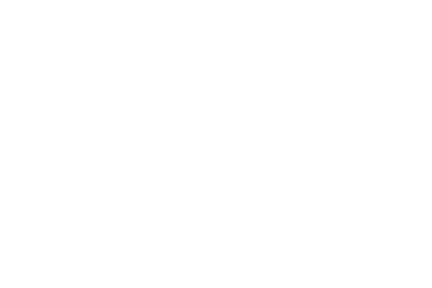

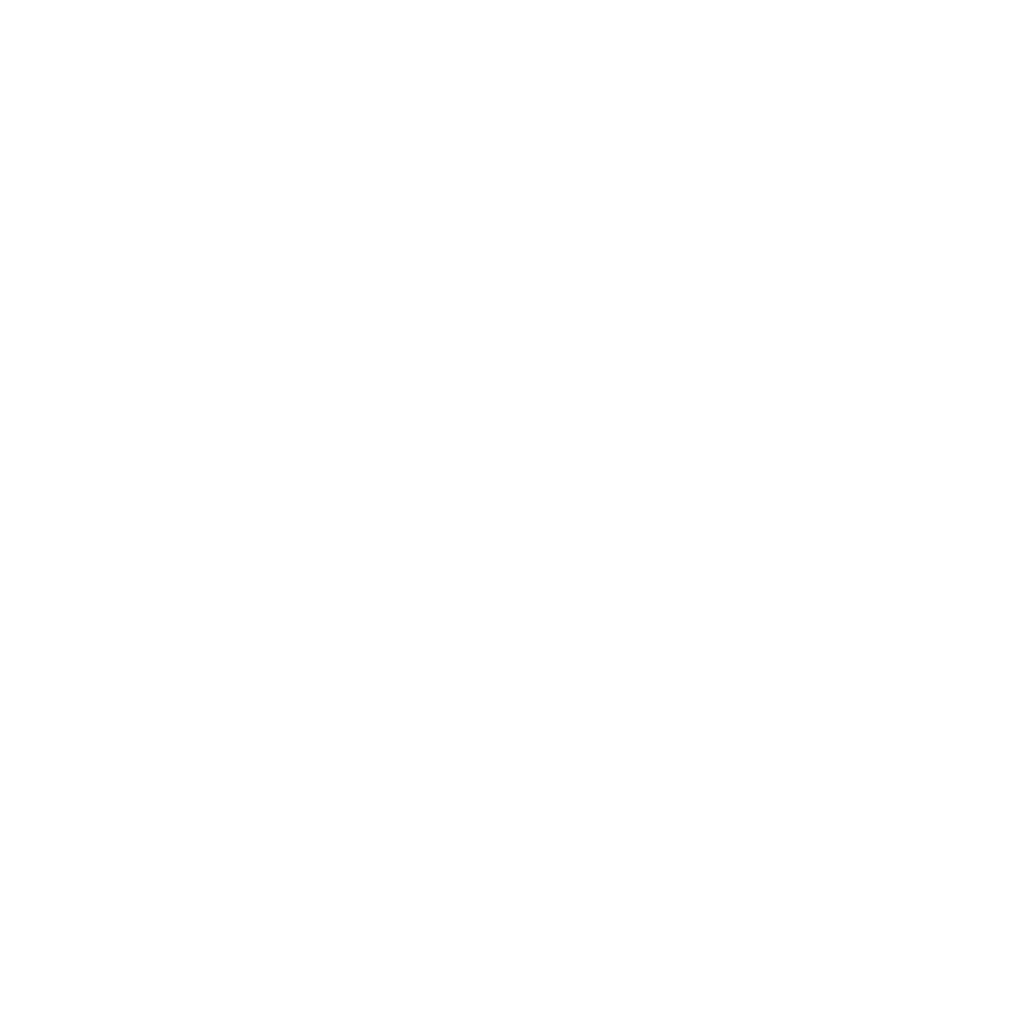

In [140]:
result, path = saving_saliency_result(img, blurred, saliency_path)
result, path 
